<a href="https://colab.research.google.com/github/leejukyu/Unsupervised-Reinforcement/blob/main/%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

클러스터링

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 생성
np.random.seed(1)
N=100
K=3
T3 = np.zeros((N,3), dtype=np.uint8)
X = np.zeros((N,2))
X_range0 = [-3,3]
X_range1 = [-3,3]
X_col = ['cornflowerblue', 'black', 'white']

# 분포의 중심
Mu = np.array([[-.5, -.5], [.5,1.0], [1, -.5]])
# 분포의 분산
Sig = np.array([[.7, .7], [.8,.3], [.3,.8]])
# 누적확률
Pi = np.array([0.4,0.8,1])
for n in range(N):
    wk = np.random.rand()
    for k in range(K):
        if wk < Pi[k]:
            T3[n,k]=1
            break
    for k in range(2):
        X[n,k] = (np.random.randn()*Sig[T3[n,:]==1,k] + Mu[T3[n,:]==1,k])

In [2]:
# 데이터를 그리기
def show_data(x):
    plt.plot(x[:,0],x[:,1], linestyle='none', marker='o',markersize=6, 
             markeredgecolor = 'black', color = 'gray', alpha=0.8)
    plt.grid(True)

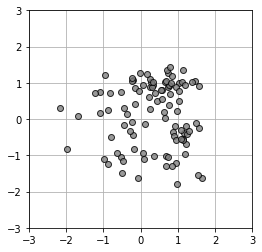

In [3]:
# 메인
plt.figure(1, figsize = (4,4))
show_data(X)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()
np.savez('data_ch9.npz', X=X, X_range0=X_range0, x_range1=X_range1)

K-means

In [4]:
# step0 : 변수의 준비와 초기화
def show_prm(x, r, mu, col):
    for k in range(K):
        # 데이터 분포의 묘사
        plt.plot(x[r[:,k]==1,0], x[r[:,k]==1,1], marker='o', 
                 markeredgecolor='k', markersize=6, alpha=0.5, linestyle='none')
        # 데이터의 평균을 '별표'로 묘사
        plt.plot(mu[k,0], mu[k,1], marker='*',markerfacecolor=X_col[k], 
                 markersize=15, markeredgecolor='k', markeredgewidth=1)
    plt.xlim(X_range0)
    plt.ylim(X_range1)
    plt.grid(True)

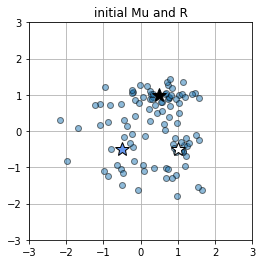

In [5]:
plt.figure(figsize=(4,4))
R = np.c_[np.ones((N,1)),np.zeros((N,2))]
show_prm(X,R,Mu,X_col)
plt.title('initial Mu and R')
plt.show()

In [6]:
# step1: R의 갱신
def step1_kmeans(x0,x1,mu):
    N=len(x0)
    r = np.zeros((N,K))
    for n in range(N):
        wk = np.zeros(K)
        for k in range(K):
            wk[k]=(x0[n]-mu[k,0])**2 + (x1[n]-mu[k,1])**2
        r[n,np.argmin(wk)] = 1
    return r

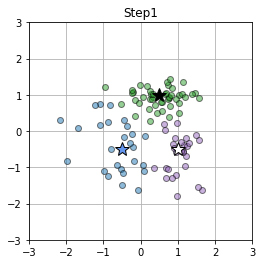

In [7]:
plt.figure(figsize=(4,4))
R = step1_kmeans(X[:,0], X[:,1], Mu)
show_prm(X,R,Mu,X_col)
plt.title('Step1')
plt.show()

In [8]:
# step2 : u의 갱신
def step2_kmeans(x0,x1,r):
    mu = np.zeros((K,2))
    for k in range(K):
        mu[k,0] = np.sum(r[:,k]*x0)/np.sum(r[:,k])
        mu[k,1] = np.sum(r[:,k]*x1)/np.sum(r[:,k])
    return mu

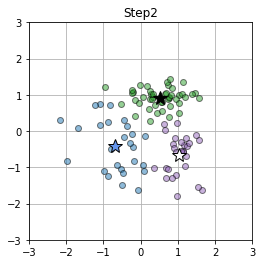

In [9]:
plt.figure(figsize=(4,4))
Mu = step2_kmeans(X[:,0],X[:,1],R)
show_prm(X,R,Mu,X_col)
plt.title('Step2')
plt.show()

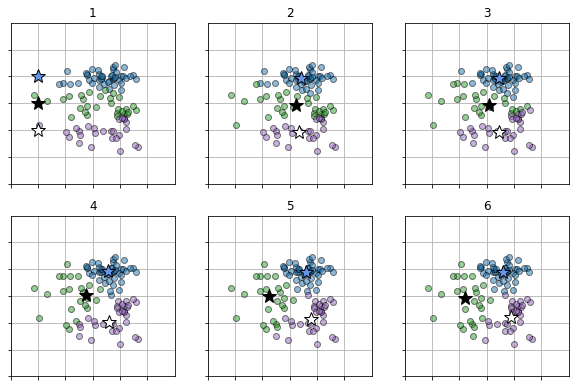

In [11]:
# step1 과 step2 반복하고 변수값이 변화하지 않으면 프로그램 종료
plt.figure(1, figsize=(10, 6.5))
Mu = np.array([[-2,1],[-2,0],[-2,-1]])
max_it = 6 # 반복횟수
for it in range(0, max_it):
    plt.subplot(2, 3, it+1)
    R = step1_kmeans(X[:,0],X[:,1],Mu)
    show_prm(X,R,Mu,X_col)
    plt.title("{0:d}".format(it+1))
    plt.xticks(range(X_range0[0], X_range0[1]),"")
    plt.yticks(range(X_range1[0], X_range1[1]),"")
    Mu = step2_kmeans(X[:,0],X[:,1],R)
plt.show()

In [15]:
# 왜곡 척도
def distortion_measure(x0, x1, r, mu):
    N = len(x0)
    J = 0
    for n in range(N):
        for k in range(K):
            J = J + r[n,k] * ((x0[n]-mu[k,0])**2 + (x1[n] - mu[k,1])**2)
    return J

## test, Mu와 R의 초기화
Mu = np.array([[-2,1],[-2,0],[-2,-1]])
R = np.c_[np.ones((N,1), dtype=int), np.zeros((N,2), dtype=int)]
distortion_measure(X[:,0],X[:,1],R,Mu)

771.7091170334878

[627.54  73.39  70.39  57.59  48.31  47.28  46.86  46.86  46.86  46.86]


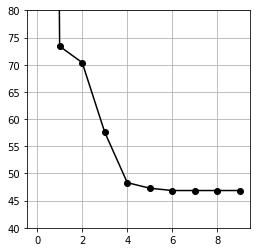

In [16]:
N=X.shape[0]
K=3
Mu=np.array([[-2,1],[-2,0],[-2,-1]])
R=np.c_[np.ones((N,1),dtype=int),np.zeros((N,2),dtype=int)]
max_it = 10
it = 0
DM = np.zeros(max_it) # 왜곡 척도의 계산 결과를 넣는다
for it in range(0, max_it): # K-means기법
    R = step1_kmeans(X[:,0],X[:,1],Mu) 
    DM[it] = distortion_measure(X[:,0],X[:,1],R,Mu) # 왜곡척도
    Mu = step2_kmeans(X[:,0],X[:,1],R)
print(np.round(DM,2))
plt.figure(2, figsize=(4,4))
plt.plot(DM, color='black',linestyle='-', marker='o')
plt.ylim(40,80)
plt.grid(True)
plt.show()

# 왜곡 척도는 반복계산을 통해 계속 감소한다

가우시안 혼합 모델

In [28]:
def gauss(x, mu, sigma):
    N,D = x.shape
    c1= 1/(2*np.pi)**(D/2)
    c2 = 1/(np.linalg.det(sigma)**(1/2))
    inv_sigma = np.linalg.inv(sigma)
    c3 = x-mu
    c4 = np.dot(c3, inv_sigma)
    c5 = np.zeros(N)
    for d in range(D):
        c5 = c5+c4[:,d] * c3[:,d]
    p=c1*c2*np.exp(-c5/2)
    return p

In [29]:
def mixgauss(x, pi, mu, sigma):
    N,D = x.shape
    K = len(pi)
    p = np.zeros(N)
    for k in range(K):
        p = p+pi[k]*gauss(x,mu[k,:], sigma[k,:,:])
    return p

In [30]:
x = np.array([[1,2],[2,2],[3,4]])
pi = np.array([0.3,0.7])
mu = np.array([[1,1],[2,2]])
sigma=np.array([[[1,0],[0,1]],[[2,0],[0,1]]])
print(mixgauss(x,pi,mu,sigma))

[0.09031182 0.09634263 0.00837489]


In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
# 혼합 등고선 표시
def show_contour_mixgauss(pi, mu, sigma):
    xn = 40 # 등고선 표시 해상도
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0],X_range1[1],xn)
    xx0,xx1 = np.meshgrid(x0,x1)
    x = np.c_[np.reshape(xx0, xn*xn, 1), np.reshape(xx1, xn*xn,1)]
    f = mixgauss(x, pi, mu, sigma)
    f = f.reshape(xn,xn)
    f=f.T
    plt.contour(x0,x1,f,10,colors='gray')

In [33]:
# 혼합 가우스 3D 표시
def show3d_mixgauss(ax, pi, mu, sigma):
    xn = 40 # 등고선 표시 해상도
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0],X_range1[1],xn)
    xx0,xx1 = np.meshgrid(x0,x1)
    x = np.c_[np.reshape(xx0, xn*xn, 1), np.reshape(xx1, xn*xn,1)]
    f = mixgauss(x, pi, mu, sigma)
    f = f.reshape(xn,xn)
    f=f.T
    ax.plot_surface(xx0, xx1, f, rstride=2, cstride=2, alpha=0.3, color = 'blue', edgecolor='black')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


TypeError: ignored

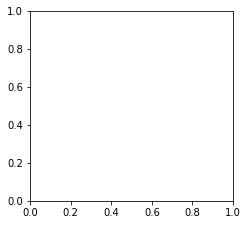

In [34]:
# test
pi = np.array([0.2,0.4,0.4])
mu = np.array([[-2,-2],[-1,1],[1.5,1]])
sigma = np.array([[[.5,0],[0,.5]],[[1,0.25],[0.25,.5]],[.5,0],[0,.5]])

Fig = plt.figure(1, figsize=(8,3.5))
Fig.add_subplot(1,2,1)
show_contour_mixgauss(pi, mu, sigma)
plt.grid(True)

Ax = Fig.add_subplot(1,2,2,projection='3d')
show3d_mixgauss(Ax, pi, mu, sigma)
Ax.set_zticks([0.05,0.10])
Ax.set_xlabel('$x_0$', fontsize=14)
Ax.set_ylabel('$x_1$', fontsize=14)
Ax.view_init(40,-100)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()